In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
# %matplotlib notebook

In [2]:
# Importing the satellite remote sensing measurement data for Sea Surface Temperature (SST)
# for the Central Great Barrier Reef Region
# Source Link(NOAA website): https://coralreefwatch.noaa.gov/product/vs/data.php
# Description of Columns: https://coralreefwatch.noaa.gov/product/vs/description.php#ascii
SST_data = pd.read_fwf('Resources/gbr_central.txt')
SST_data.head()

,YYYY,MM,DD,SST_MIN,SST_MAX,SST@90th_HS,SSTA@90th_HS,90th_HS>0,DHW_from_90th_HS>1,BAA_7day_max
0,1985,1,1,27.92,28.32,28.07,0.6058,0.12,0.0,0
1,1985,1,2,27.85,28.33,28.01,0.5865,0.10,0.0,0
2,1985,1,3,27.87,28.47,28.01,0.4874,0.06,0.0,0
3,1985,1,4,27.82,28.58,27.97,0.4903,0.04,0.0,0
4,1985,1,5,27.95,28.73,28.07,0.5616,0.13,0.0,0


In [3]:
# Renaming columns and combining colums to get the date
SST_data = SST_data.rename(columns={'YYYY': 'Year',
                           'MM': 'Month',
                           'DD': 'Day'
                          })

SST_data['Date'] = SST_data['Month'].astype(str)+ '/'+ SST_data['Day'].astype(str) \
                    + '/' + SST_data['Year'].astype(str)

SST_data = SST_data[['Year','Month','Day', 'Date','SST_MIN','SST_MAX','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']]
SST_data.head()

,Year,Month,Day,Date,SST_MIN,SST_MAX,SST@90th_HS,90th_HS>0,DHW_from_90th_HS>1
0,1985,1,1,1/1/1985,27.92,28.32,28.07,0.12,0.0
1,1985,1,2,1/2/1985,27.85,28.33,28.01,0.10,0.0
2,1985,1,3,1/3/1985,27.87,28.47,28.01,0.06,0.0
3,1985,1,4,1/4/1985,27.82,28.58,27.97,0.04,0.0
4,1985,1,5,1/5/1985,27.95,28.73,28.07,0.13,0.0


In [4]:
# Filtering data for years 2000 - 2020
data = SST_data.loc[(SST_data['Year']>1999)]
data.reset_index(drop=True, inplace=True)
data.shape

(7399, 9)

In [5]:
# Source link: https://coralreefwatch.noaa.gov/product/vs/data/gbr_central.txt
# Long-term mean temperature for each month (Jan-Dec)
averaged_monthly_mean = [28.2080, 28.3422, 27.7395, 26.6994, 25.3221, 23.6220,
                         22.7473, 22.7427, 23.6184, 25.0898, 26.6232, 27.4833]

# Modified the order for averaged_monthly_mean (April to March)
modified_averaged_monthly_mean = [ 26.6994, 25.3221, 23.6220, 22.7473, 22.7427,23.6184,
                                  25.0898, 26.6232, 27.4833, 28.2080, 28.3422, 27.7395]

averaged_max_monthly_mean = max(averaged_monthly_mean)
print(f"The value of maximum monthly mean for Central Region of GBR is {averaged_max_monthly_mean} degree Celcius.")

# Bleaching Threshold is 1° C more than max average month temperature
bleaching_threshold = averaged_max_monthly_mean + 1
print(f"The value of bleaching threshold for Central Region of GBR is {bleaching_threshold} degree Celcius.")

The value of maximum monthly mean for Central Region of GBR is 28.3422 degree Celcius.
The value of bleaching threshold for Central Region of GBR is 29.3422 degree Celcius.


### Description of Columns: 
https://coralreefwatch.noaa.gov/product/vs/description.php#ascii

MMM(Maximum Monthly Mean): Highest monthly mean temperature (Long-Term). This value is 28.3422°C for Central GBR region.

HS(HotSpot): SST above the MMM. (Unit for SST: degree Celsius)

DHW(Degree Heat Week): Thermal stress accumulated over a 12-week period.
DHW is the the sum of HS value over a 12 week period. (Unit for DHW: degree Celcius Week)

SST@90th_HS:
The daily SST value where the HotSpot value is equal to the 90th percentile HotSpot value for pixels contained in a Regional Virtual Station.

### Note: For analysis, the Sea Surface Temperature in column 'SST@90th_HS' is used in all plots.

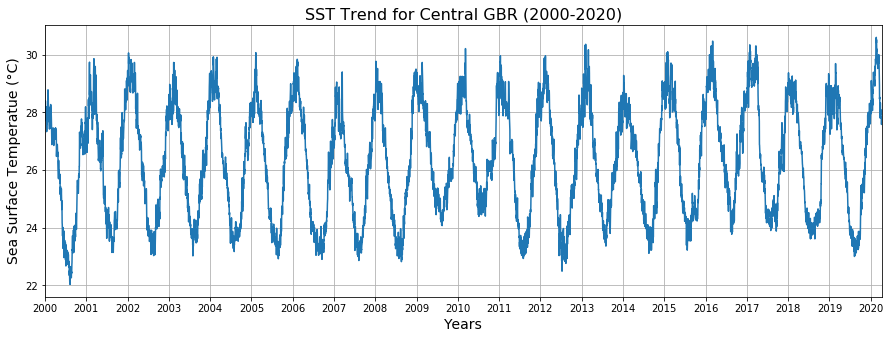

In [6]:
# Analyzing the trand in SST over last 20 years
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

major_ticks = np.arange(1, 7401, 365)
labels = np.arange(2000,2021,1)
ax.set_xticks(major_ticks)
ax.set_xticklabels(labels)
plt.plot(data['SST@90th_HS'])
plt.xlim(1, 7400)
plt.grid()
plt.xlabel('Years', fontsize='14')
plt.ylabel('Sea Surface Temperatue (°C)', fontsize='14')
plt.title('SST Trend for Central GBR (2000-2020)', fontsize='16')
plt.savefig('Output/SavedPlots/20_year_trend_central.png')
plt.show()


In [7]:
# Changing the index to 'Date' column
modified_data = SST_data.set_index('Date')

# Creating a new dataframe for last 5 years (April 2015 to March 2020)
five_year_data = modified_data.loc['4/1/2015':,]

In [8]:
# Grouping the five year data by year and month
five_year_grouped = five_year_data.groupby(['Year','Month'])
mean_five_year_grouped = five_year_grouped.mean()   #calculating mean of all values
max_five_year_grouped = five_year_grouped.max()     #calculating max of all values

In [9]:
# Calculating the monthly values for SST, HS and DHW
max_SST = max_five_year_grouped['SST@90th_HS']
mean_SST = mean_five_year_grouped['SST@90th_HS']

max_HS = max_five_year_grouped['90th_HS>0']

max_DHW = max_five_year_grouped['DHW_from_90th_HS>1']

In [10]:
#Setting the x-axis
x_axis = np.arange(1,62,1)

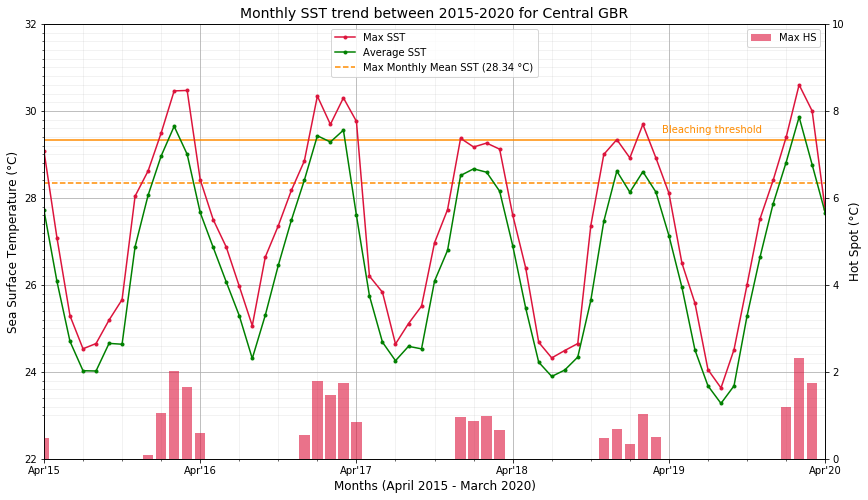

In [11]:
#Plotting the monthly trend in SST, HS and DHWfor last 5 years
fig, ax = plt.subplots(figsize=(14,8))

#Using left y-axis to plot SST
plt.plot(x_axis, max_SST, label= "Max SST", color= 'crimson', marker ='.')
plt.plot(x_axis, mean_SST, label= "Average SST", color= 'green', marker ='.')
plt.hlines(averaged_max_monthly_mean, 1, 61, color='darkorange', 
           label='Max Monthly Mean SST (28.34 °C)', linestyle='dashed')
plt.hlines(bleaching_threshold, 1, 61, color='darkorange')
plt.annotate("Bleaching threshold",(48.5,29.5),fontsize=10,color="darkorange")
plt.xlim(1,61)
plt.ylim(22,32)
major_xticks = np.arange(1, 62, 12)
minor_xticks = np.arange(1, 62, 3)
minor_yticks = np.arange(23,32,0.2)
ax.set_xticks(major_xticks)
ax.set_xticklabels(["Apr'15","Apr'16", "Apr'17", "Apr'18", "Apr'19", "Apr'20"], fontsize=10)
ax.set_xticks(minor_xticks, minor = True)
ax.set_yticks(minor_yticks, minor = True)
plt.title('Monthly SST trend between 2015-2020 for Central GBR', fontsize=14)
plt.xlabel('Months (April 2015 - March 2020)', fontsize=12)
plt.ylabel('Sea Surface Temperature (°C)', fontsize=12)
plt.legend(loc='upper center')
plt.grid()
ax.grid(which='minor', alpha=0.2)

#Using right y-axis to plot HotSpot
ax2 = ax.twinx()
plt.ylim(0,10)
plt.ylabel('Hot Spot (°C)', fontsize=12)
plt.bar(x_axis, max_HS, label= "Max HS", color= 'crimson',alpha=0.6)
plt.legend()
plt.savefig('Output/SavedPlots/5_year_SST_trend_central.png')
plt.show()

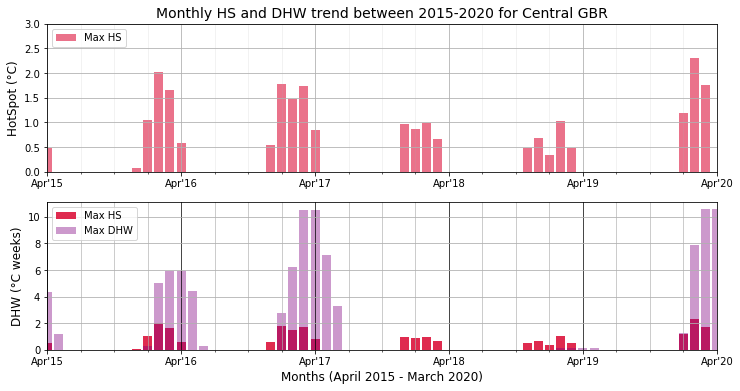

In [12]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,1,1)


ax1.bar(x_axis, max_HS, label= "Max HS", color= 'crimson', alpha=0.6)
ax1.set_xlim(1,61)
ax1.set_ylim(0,3)
major_xticks = np.arange(1, 62, 12)
minor_xticks = np.arange(1, 62, 3)
ax1.set_xticks(major_xticks)
ax1.set_xticklabels(["Apr'15","Apr'16", "Apr'17", "Apr'18", "Apr'19", "Apr'20"], fontsize=10)
ax1.set_xticks(minor_xticks, minor = True)

plt.title('Monthly HS and DHW trend between 2015-2020 for Central GBR', fontsize=14)
plt.ylabel('HotSpot (°C)', fontsize=12)
plt.legend(loc='upper left')
ax1.grid()
ax1.grid(which='minor', alpha=0.2)

ax2 = fig.add_subplot(2,1,2)
ax2.bar(x_axis, max_HS, label= "Max HS", color= 'crimson', alpha=0.9)
ax2.bar(x_axis, max_DHW, label= "Max DHW", color= 'purple', alpha=0.4)

ax2.set_xticks(major_xticks)
ax2.set_xticklabels(["Apr'15","Apr'16", "Apr'17", "Apr'18", "Apr'19", "Apr'20"], fontsize=10)
ax2.set_xticks(minor_xticks, minor = True)
ax2.set_xlim(1,61)
ax2.grid()
ax2.grid(axis='x',which='major', color='k',alpha=0.9)
ax2.grid(which='minor', alpha=0.8)
plt.ylabel('DHW (°C weeks)', fontsize=12)
plt.xlabel('Months (April 2015 - March 2020)', fontsize=12)
plt.legend(loc='upper left')
plt.savefig('Output/SavedPlots/5_year_DHW_trend_central.png')
plt.show()

In [13]:
# Filtering the data for for last 5 years
data_2015_16 = five_year_data.loc['4/1/2015':'3/31/2016']
data_2016_17 = five_year_data.loc['4/1/2016':'3/31/2017']
data_2017_18 = five_year_data.loc['4/1/2017':'3/31/2018']
data_2018_19 = five_year_data.loc['4/1/2018':'3/31/2019']
data_2019_20 = five_year_data.loc['4/1/2019':'3/31/2020']

# data_2019_20

In [14]:
# Calculating the Maximum values for each month (for the last 5 years)
month_2015_16 = data_2015_16.groupby('Month')
month_avg_2015_16 = month_2015_16[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].max()

month_2016_17 = data_2016_17.groupby('Month')
month_avg_2016_17 = month_2016_17[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].max()

month_2017_18 = data_2017_18.groupby('Month')
month_avg_2017_18 = month_2017_18[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].max()

month_2018_19 = data_2018_19.groupby('Month')
month_avg_2018_19 = month_2018_19[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].max()

month_2019_20 = data_2019_20.groupby('Month')
month_avg_2019_20 = month_2019_20[['Year','SST@90th_HS','90th_HS>0','DHW_from_90th_HS>1']].max()

month_avg_2019_20
# The resulting data is ordered by month (Jan to Dec)

,Year,SST@90th_HS,90th_HS>0,DHW_from_90th_HS>1
Month,,,,
1,2020,29.39,1.19,1.2471
2,2020,30.60,2.31,7.8514
3,2020,30.00,1.75,10.6086
4,2019,28.11,0.00,0.1471
5,2019,26.50,0.00,0.1471
6,2019,25.58,0.00,0.0000
7,2019,24.05,0.00,0.0000
8,2019,23.63,0.00,0.0000
9,2019,24.51,0.00,0.0000


In [15]:
# Rearranging the rows of the dataframe containing the month wise average for each year
# This is being done so that the graph starts from April (previous year) to March.
# and not Jan to Dec (because summer months are Dec-Mar)

new_index = [4,5,6,7,8,9,10,11,12,1,2,3]

month_avg_2015_16 = month_avg_2015_16.reindex(new_index)
month_avg_2016_17 = month_avg_2016_17.reindex(new_index)
month_avg_2017_18 = month_avg_2017_18.reindex(new_index)
month_avg_2018_18 = month_avg_2018_19.reindex(new_index)
month_avg_2019_20 = month_avg_2019_20.reindex(new_index)

month_avg_2019_20

,Year,SST@90th_HS,90th_HS>0,DHW_from_90th_HS>1
Month,,,,
4,2019,28.11,0.00,0.1471
5,2019,26.50,0.00,0.1471
6,2019,25.58,0.00,0.0000
7,2019,24.05,0.00,0.0000
8,2019,23.63,0.00,0.0000
9,2019,24.51,0.00,0.0000
10,2019,26.00,0.00,0.0000
11,2019,27.52,0.00,0.0000
12,2019,28.40,0.00,0.0000


In [16]:
# Defining the labels for the x axis
x_axis = np.arange(1,13,1)
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']

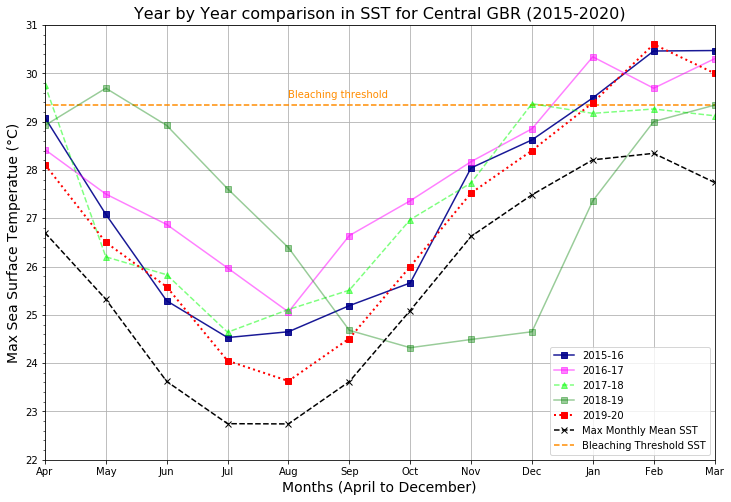

In [17]:
fig,ax = plt.subplots(figsize=(12,8))

ax.plot(x_axis, month_avg_2015_16['SST@90th_HS'], label='2015-16', 
        color='darkblue', marker='s', alpha=0.9)
ax.plot(x_axis, month_avg_2016_17['SST@90th_HS'], label='2016-17',
        color='magenta', marker='s', alpha=0.5)
ax.plot(x_axis, month_avg_2017_18['SST@90th_HS'], label='2017-18',
        color='lime', marker='^', alpha=0.5, linestyle='dashed')
ax.plot(x_axis, month_avg_2018_19['SST@90th_HS'], label='2018-19',
        color='green', marker='s', alpha=0.4)
ax.plot(x_axis, month_avg_2019_20['SST@90th_HS'], label='2019-20',
        color='red', marker='s', alpha=1, linewidth=2, linestyle='dotted')

ax.plot(x_axis, modified_averaged_monthly_mean, color = 'black',
        marker = 'x', linestyle='dashed', label='Max Monthly Mean SST')
ax.hlines(bleaching_threshold, 1, 12, color='darkorange', label='Bleaching Threshold SST',linestyle='dashed')
plt.annotate("Bleaching threshold",(5,29.5),fontsize=10,color="darkorange")

ax.set_xticks(x_axis)
ax.set_xticklabels(months)
ax.set_yticks(np.arange(22,31,0.2),minor=True)
plt.xlim(1,12)
plt.ylim(22,31)
plt.legend(loc = 'lower right')
plt.xlabel('Months (April to December)', fontsize='14')
plt.ylabel('Max Sea Surface Temperatue (°C)', fontsize='14')
plt.title('Year by Year comparison in SST for Central GBR (2015-2020)', fontsize='16')
plt.savefig('Output/SavedPlots/year_by_year_SST_central.png')
plt.grid()
plt.show()

#### Null Hypothesis: There is no significant change in the SST over the last five years for Central GBR

In [18]:
# Daily data for summer months (Dec - March) for each year
summer_2015_16 = five_year_data.loc['12/1/2015':'3/31/2016']['SST@90th_HS']
summer_2016_17 = five_year_data.loc['12/1/2016':'3/31/2017']['SST@90th_HS']
summer_2017_18 = five_year_data.loc['12/1/2017':'3/31/2018']['SST@90th_HS']
summer_2018_19 = five_year_data.loc['12/1/2018':'3/31/2019']['SST@90th_HS']
summer_2019_20 = five_year_data.loc['12/1/2019':'3/31/2020']['SST@90th_HS']

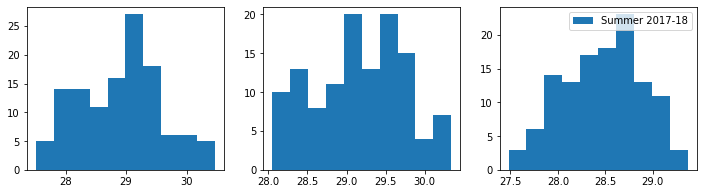

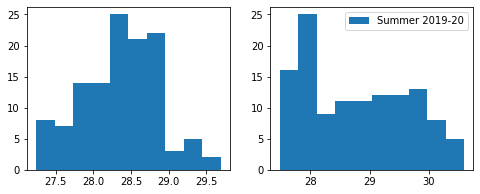

Summer 2015_16: NormaltestResult(statistic=0.2381241994825016, pvalue=0.8877526698390681)
Summer 2016_17: NormaltestResult(statistic=2.449049124047342, pvalue=0.29389739709604945)
Summer 2017_18: NormaltestResult(statistic=2.790921344598581, pvalue=0.24771889284592308)
Summer 2018_19: NormaltestResult(statistic=0.08388875646843101, pvalue=0.9589231160861313)
Summer 2019_20: NormaltestResult(statistic=17.340486927654204, pvalue=0.00017161731652916163)


In [19]:
# Checking if the summer data for each year follows a normal ditribution

fig, ax = plt.subplots(1,3, figsize=(12,3))
ax[0].hist(summer_2015_16, label='Summer 2015-16')
ax[1].hist(summer_2016_17, label='Summer 2016-17')
ax[2].hist(summer_2017_18, label='Summer 2017-18')
plt.legend()

plt.show()
fig2, ax2 = plt.subplots(1,2, figsize=(8,3))
ax2[0].hist(summer_2018_19, label='Summer 2018-19')
ax2[1].hist(summer_2019_20, label='Summer 2019-20')
plt.legend()
plt.savefig('Output/SavedPlots/year_by_year_histogram_central.png')
plt.show()

print(f'Summer 2015_16: {sts.normaltest(summer_2015_16.sample(50))}')
print(f'Summer 2016_17: {sts.normaltest(summer_2016_17.sample(50))}')
print(f'Summer 2017_18: {sts.normaltest(summer_2017_18.sample(50))}')
print(f'Summer 2018_19: {sts.normaltest(summer_2018_19.sample(50))}')
print(f'Summer 2019_20: {sts.normaltest(summer_2019_20.sample(50))}')

In [20]:
summer_2015_16_df = summer_2015_16.reset_index()
summer_2016_17_df = summer_2016_17.reset_index()
summer_2017_18_df = summer_2017_18.reset_index()
summer_2018_19_df = summer_2018_19.reset_index()
summer_2019_20_df = summer_2019_20.reset_index()

In [21]:
# Creating a combined DataFrame for Summer Months (Dec-March) for five years to plot a boxplot
summer_2015_16_df['Year'] = '2015-16'
summer_2016_17_df['Year'] = '2016-17'
summer_df = pd.merge(summer_2015_16_df, summer_2016_17_df,how='outer') #merging df for 2015_16 and 2016_17

summer_2017_18_df['Year'] = '2017-18'
summer_df = pd.merge(summer_df, summer_2017_18_df, how='outer')

summer_2018_19_df['Year'] = '2018-19'
summer_df = pd.merge(summer_df, summer_2018_19_df, how='outer')

summer_2019_20_df['Year'] = '2019-20'
summer_df = pd.merge(summer_df, summer_2019_20_df, how='outer')

summer_df.to_csv('Output/DataFiles/Summer_DF_Central_GBR.csv', index=False)
summer_df

,Date,SST@90th_HS,Year
0,12/1/2015,27.99,2015-16
1,12/2/2015,27.76,2015-16
2,12/3/2015,27.88,2015-16
3,12/4/2015,27.83,2015-16
4,12/5/2015,28.14,2015-16
...,...,...,...
602,3/27/2020,27.88,2019-20
603,3/28/2020,27.87,2019-20
604,3/29/2020,27.79,2019-20
605,3/30/2020,27.85,2019-20


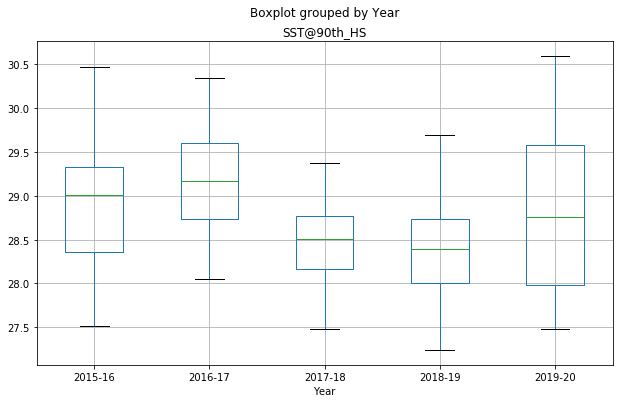

In [22]:
summer_df.boxplot("SST@90th_HS", by="Year", figsize=(10, 6))
plt.savefig('Output/SavedPlots/year_by_year_boxplot_central.png')
plt.show()

### Comparison of last  five years for Central GBR region

#### Null Hypothesis: 
There was no significant difference in the  Sea Surface Temperature during the summer of 2016, 2017, 2018, 2019 and 2020

#### Alternate Hypothesis: 
At least one year was significantly different from the other years

#### Analysis using ANOVA

In [23]:
sts.f_oneway(summer_2015_16, summer_2016_17, summer_2017_18, summer_2018_19, summer_2019_20)

F_onewayResult(statistic=31.862851358175284, pvalue=4.224088596903869e-24)

Assuming 5% significance level, we reject the Null Hypothesis as pvalue < 0.05

#### There have been variations of the average SST observed over these time periods.